# Case Study: How does a Bike-Share Navigate Speedy Success?

In this notebook, I will create the database for last 12 month of the data using SQLite3. 

Data source: https://divvy-tripdata.s3.amazonaws.com/index.html

### See if the data ROCCC:
R: Reliable

O: Original

C: Comprehensive

C: Current

C: Cited

In [1]:
import sqlite3
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.figsize": (10, 6), "figure.dpi": 120})

## Process of storing the csv file to database

In [3]:
data_dir = r".\Data"
file_names = [f for f in listdir(data_dir) if isfile(join(data_dir, f))]

In [6]:
%%time
data_len = 0
for file_name in file_names:
    data_path = data_dir + '\\' + file_name
    df = pd.read_csv(data_path)
    data_len += len(df)
data_len

CPU times: total: 11.6 s
Wall time: 11.7 s


5667717

In [5]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,41.881370,-87.674930,member
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,41.920082,-87.677855,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member


In [35]:
# Create Database
connection = sqlite3.connect('cyclistic_trip.db')

# load data file to SQLite
for file_name in file_names:
    file_path = data_dir + '\\' + file_name
    df = pd.read_csv(file_path)
    df.to_sql('cyclistic_trip_data_last_12month', connection, if_exists='append', index=False)
connection.close()

### Pull the data from database

In [41]:
connection = sqlite3.connect('cyclistic_trip.db')
cursor = connection.cursor()

result = cursor.execute("SELECT * FROM cyclistic_trip_data_last_12month")
print(result.fetchmany(5))

cursor.close()
connection.close()


[('C2F7DD78E82EC875', 'electric_bike', '2022-01-13 11:59:47', '2022-01-13 12:02:44', 'Glenwood Ave & Touhy Ave', '525', 'Clark St & Touhy Ave', 'RP-007', 42.0128005, -87.665906, 42.01256011541, -87.6743671152, 'casual'), ('A6CF8980A652D272', 'electric_bike', '2022-01-10 08:41:56', '2022-01-10 08:46:17', 'Glenwood Ave & Touhy Ave', '525', 'Clark St & Touhy Ave', 'RP-007', 42.012763, -87.6659675, 42.01256011541, -87.6743671152, 'casual'), ('BD0F91DFF741C66D', 'classic_bike', '2022-01-25 04:53:40', '2022-01-25 04:58:01', 'Sheffield Ave & Fullerton Ave', 'TA1306000016', 'Greenview Ave & Fullerton Ave', 'TA1307000001', 41.9256018819, -87.6537080423, 41.92533, -87.6658, 'member'), ('CBB80ED419105406', 'classic_bike', '2022-01-04 00:18:04', '2022-01-04 00:33:00', 'Clark St & Bryn Mawr Ave', 'KA1504000151', 'Paulina St & Montrose Ave', 'TA1309000021', 41.983593, -87.669154, 41.961507, -87.671387, 'casual'), ('DDC963BFDDA51EEA', 'classic_bike', '2022-01-20 01:31:10', '2022-01-20 01:37:12', 'Mic

### Use pandas to get the data from database

In [2]:
connection = sqlite3.connect('cyclistic_trip.db')
query = 'SELECT ride_id start_station_name FROM cyclistic_trip_data_last_12month LIMIT 100'

df_station_name = pd.read_sql_query(query, connection)

connection.close()

In [3]:
df_station_name.head()

,start_station_name
0,C2F7DD78E82EC875
1,A6CF8980A652D272
2,BD0F91DFF741C66D
3,CBB80ED419105406
4,DDC963BFDDA51EEA


In [85]:
%%time
# Connect with sqlite3
connection = sqlite3.connect('cyclistic_trip.db')

query = 'SELECT * FROM cyclistic_trip_data_last_12month'

df = pd.read_sql_query(query, connection)

connection.close()

CPU times: total: 9.03 s
Wall time: 23.5 s


In [86]:
len(df)

5667717

## Before start clean data, I ask myself following questions:

* Where is my data located?
    - Data is located in my local folder as csv file. 
* How is the data organized?
    - I put last 12 month of data into SQLite3 database, and it store in my local folder. 
* Any issues with bias or credibility in the data? ROCCC
* How are you addressing licensing, privacy, security, and accessibility?
* How did you verify the data's integrity? 
    * Data integrity is the accuracy, completeness, consistency, and trustworthiness of the data throughout its lifecycle.
    * Testing data. 
        Hypothesis testing: A way to see if a survey or experiment has meaningful results
        
    * Sampling data. 
* How does it help to answer your question?
    - Answer the question to understand the question and data. 
* Are there any problems with the data?

### Data clearning and data manipulating process:

#### First to check the data to understand it:

* Check top 5 rows to understand the data
* Check the columns
* Check data types
* Check to see if any missing data
* Check to see if any duplicate data 


In [87]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [88]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [89]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.667717e+06,5.667717e+06,5.661859e+06,5.661859e+06
mean,4.190222e+01,-8.764783e+01,4.190242e+01,-8.764790e+01
std,4.626109e-02,2.999925e-02,6.805821e-02,1.082985e-01
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01
25%,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766260e+01
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01
75%,4.193000e+01,-8.762957e+01,4.193000e+01,-8.762963e+01
max,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [91]:
# See if there are any missing values. 
df.isna().count() # There are no missing values on dataframe

ride_id               5667717
rideable_type         5667717
started_at            5667717
ended_at              5667717
start_station_name    5667717
start_station_id      5667717
end_station_name      5667717
end_station_id        5667717
start_lat             5667717
start_lng             5667717
end_lat               5667717
end_lng               5667717
member_casual         5667717
dtype: int64

In [92]:
# Check if any duplicated rows
df.duplicated().count() # No duplicated rows in the dataset

5667717

## PROCESS Data:

* Convert dtatype on started_at and ended_at to datetime
* Add columns for month and day
* calculate ride length subtracting started_at from ended_at
* Add the column for day of the week. -> 1=Monday, 2=Tuesday, ........, 7=Sunday

In [93]:
# Convert start_at and endt_at to Datetime then add the Month column and Date column
df['started_at'] = pd.to_datetime(df["started_at"])
df['ended_at'] = pd.to_datetime(df['ended_at'])

import datetime as dt
df['started_month'] = df['started_at'].dt.month
df['started_day'] = df['started_at'].dt.day

df['ended_month'] = df['ended_at'].dt.month
df['ended_day'] = df['ended_at'].dt.day

# Create the column for ride length by subtracting the end time to start time
df['ride_length'] = df.ended_at - df.started_at

# Add Weekday 1=Monday, 2=Tuesday, ........, 7=Sunday
df['day_of_week'] = df['started_at'].dt.isocalendar().day

In [94]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_month,started_day,ended_month,ended_day,ride_length,day_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,1,13,1,13,0 days 00:02:57,4
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,1,10,1,10,0 days 00:04:21,1
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,1,25,1,25,0 days 00:04:21,2
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,1,4,1,4,0 days 00:14:56,2
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,1,20,1,20,0 days 00:06:02,4


## Analyze the data:



In [95]:
df['ride_length'].describe()

count                      5667717
mean     0 days 00:19:26.597144670
std      0 days 02:56:07.687857087
min              -8 days +19:26:39
25%                0 days 00:05:49
50%                0 days 00:10:17
75%                0 days 00:18:28
max               28 days 17:47:15
Name: ride_length, dtype: object

The minimum ride length is invalid. This could be due to the start and end times being recorded in the wrong order or an input error. To rectify this issue, the rows with negative ride lengths will be removed from the DataFrame

In [96]:
# Find out the negative ride_legth
df[df['ride_length'] < pd.Timedelta(0)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_month,started_day,ended_month,ended_day,ride_length,day_of_week
403591,2D97E3C98E165D80,classic_bike,2022-03-05 11:00:57,2022-03-05 10:55:01,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.936688,-87.636829,41.936688,-87.636829,casual,3,5,3,5,-1 days +23:54:04,6
406768,7407049C5D89A13D,electric_bike,2022-03-05 11:38:04,2022-03-05 11:37:57,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Wellington Ave,TA1307000052,41.936313,-87.652522,41.936253,-87.652662,casual,3,5,3,5,-1 days +23:59:53,6
1467055,0793C9208A64302A,electric_bike,2022-05-30 11:06:29,2022-05-30 11:06:17,Broadway & Waveland Ave,13325,None,None,41.949069,-87.648499,41.950000,-87.650000,casual,5,30,5,30,-1 days +23:59:48,1
1635637,B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,None,None,Kostner Ave & North Ave,519,41.900000,-87.740000,41.910000,-87.740000,casual,6,7,6,7,-1 days +21:49:58,2
1636060,072E947E156D142D,electric_bike,2022-06-07 19:14:46,2022-06-07 17:07:45,W Armitage Ave & N Sheffield Ave,20254.0,W Armitage Ave & N Sheffield Ave,20254.0,41.920000,-87.650000,41.920000,-87.650000,casual,6,7,6,7,-1 days +21:52:59,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5440034,7598EB707107648D,electric_bike,2022-11-06 01:15:50,2022-11-06 01:01:57,Federal St & Polk St,SL-008,None,None,41.872029,-87.629522,41.930000,-87.670000,casual,11,6,11,6,-1 days +23:46:07,7
5443052,75780B25C9DF4DB1,electric_bike,2022-11-06 01:59:42,2022-11-06 01:04:20,Wilton Ave & Diversey Pkwy,TA1306000014,None,None,41.932236,-87.652662,41.940000,-87.660000,member,11,6,11,6,-1 days +23:04:38,7
5464288,4139B11634039661,classic_bike,2022-11-06 01:58:46,2022-11-06 01:11:33,Clark St & Grace St,TA1307000127,Broadway & Berwyn Ave,13109,41.950780,-87.659172,41.978353,-87.659753,member,11,6,11,6,-1 days +23:12:47,7
5478445,1BA8DEBE4E13DD1D,electric_bike,2022-11-06 01:52:09,2022-11-06 01:04:23,State St & Chicago Ave,21544,None,None,41.896048,-87.628493,41.930000,-87.650000,casual,11,6,11,6,-1 days +23:12:14,7


Additionally, it is recommended to remove the observations with 0 ride time from the DataFrame. 

In [97]:
# Find out the ride_length = 0
df[df['ride_length'] == pd.Timedelta(0)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_month,started_day,ended_month,ended_day,ride_length,day_of_week
21591,C2E047DDF019C255,electric_bike,2022-01-18 19:25:42,2022-01-18 19:25:42,Green St & Madison St,TA1307000120,None,None,41.881783,-87.648608,41.880000,-87.650000,member,1,18,1,18,0 days,2
81320,8D3E8E511FEB11CC,electric_bike,2022-01-21 01:05:35,2022-01-21 01:05:35,Western Ave & Winnebago Ave,13068,None,None,41.915525,-87.687039,41.920000,-87.690000,casual,1,21,1,21,0 days,5
97019,A753A729011B4289,electric_bike,2022-01-09 10:39:48,2022-01-09 10:39:48,Clark St & Bryn Mawr Ave,KA1504000151,None,None,41.983567,-87.669127,41.980000,-87.670000,member,1,9,1,9,0 days,7
97365,0C63D14D261205FA,electric_bike,2022-01-28 15:28:11,2022-01-28 15:28:11,Wells St & Hubbard St,TA1307000151,None,None,41.890174,-87.634231,41.890000,-87.630000,casual,1,28,1,28,0 days,5
99658,4B0FC5ACEE52EBF9,electric_bike,2022-01-18 19:38:26,2022-01-18 19:38:26,Sheffield Ave & Wrightwood Ave,TA1309000023,None,None,41.928670,-87.653789,41.930000,-87.650000,casual,1,18,1,18,0 days,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595663,0D6D8E1FB6361A7F,classic_bike,2022-12-09 17:00:05,2022-12-09 17:00:05,LaSalle St & Jackson Blvd,TA1309000004,LaSalle St & Jackson Blvd,TA1309000004,41.878166,-87.631929,41.878166,-87.631929,member,12,9,12,9,0 days,5
5603044,CE8B25EE8BC25DF2,electric_bike,2022-12-18 11:54:47,2022-12-18 11:54:47,Franklin St & Illinois St,RN-,Franklin St & Illinois St,RN-,41.891051,-87.635317,41.891023,-87.635480,casual,12,18,12,18,0 days,7
5629497,1C9AC091E19D9909,electric_bike,2022-12-08 17:05:32,2022-12-08 17:05:32,Lincoln Ave & Winona St,KA1504000078,None,None,41.974927,-87.692695,41.970000,-87.690000,member,12,8,12,8,0 days,4
5630298,4EEBB6ACBEBE8E80,electric_bike,2022-12-10 13:33:49,2022-12-10 13:33:49,Lincoln Ave & Roscoe St*,chargingstx5,None,None,41.943280,-87.670835,41.940000,-87.670000,member,12,10,12,10,0 days,6


#### There are 100 observations with negative ride time and 431 observations with a ride length of 0 in the dataset. As the cause of these results cannot be determined, the corresponding rows will be removed from the DataFrame.

In [98]:
neg_ride_length = df[df['ride_length'] < pd.Timedelta(0)].index
zero_ride_length = df[df['ride_length'] == pd.Timedelta(0)].index

In [99]:
df.drop(neg_ride_length, axis=0, inplace=True)
df.drop(zero_ride_length, axis=0, inplace=True)
len(df)

5667186

In [100]:
df['ride_length'].describe()

count                      5667186
mean     0 days 00:19:26.845749901
std      0 days 02:56:04.932799822
min                0 days 00:00:01
25%                0 days 00:05:49
50%                0 days 00:10:17
75%                0 days 00:18:28
max               28 days 17:47:15
Name: ride_length, dtype: object

In [102]:
# explore longer than 1 day of ride length data to see if those are the casual rider who is not returning the bike for long period of time
one_day_or_more = df[df['ride_length'] > pd.Timedelta('1 days')]
one_day_or_more['member_casual'].value_counts()

casual    4644
member     716
Name: member_casual, dtype: int64

In [103]:
one_day_or_more['ride_length'].describe()

count                         5360
mean     2 days 08:18:18.804104477
std      3 days 03:36:38.849973266
min                1 days 00:00:45
25%                1 days 00:59:53
50%                1 days 00:59:55
75%         1 days 12:18:05.750000
max               28 days 17:47:15
Name: ride_length, dtype: object

In [107]:
# More than 2 days of ride length
two_day_or_more = df[df['ride_length'] > pd.Timedelta('2 days')]
two_day_or_more['member_casual'].value_counts()

casual    1168
Name: member_casual, dtype: int64

In [108]:
two_day_or_more['ride_length'].describe()

count                         1168
mean     6 days 21:36:21.089897260
std      4 days 08:30:04.101603035
min                2 days 00:03:40
25%         3 days 08:38:07.750000
50%         5 days 21:22:58.500000
75%         9 days 02:56:35.500000
max               28 days 17:47:15
Name: ride_length, dtype: object

In [110]:
# try see the result only one day use
one_day_use = df[df['ride_length'] < pd.Timedelta('2 days')]
one_day_use['member_casual'].value_counts()

member    3345417
casual    2320601
Name: member_casual, dtype: int64

In [111]:
one_day_use['ride_length'].describe()

count                      5666018
mean     0 days 00:17:24.188773314
std      0 days 00:51:21.072734600
min                0 days 00:00:01
25%                0 days 00:05:49
50%                0 days 00:10:17
75%                0 days 00:18:27
max                1 days 23:58:49
Name: ride_length, dtype: object

#### Findings:

* Only Casual riders used more than two days. 
* Member is returning the bike less than 2 days. 

This shows the different behaviour between casual riders and annual members. 

I will find out the ride_legth by the user_type

In [80]:
df['ride_length'] = df['ride_length'].astype('int64')
avg_member_ride = df.groupby(['member_casual', 'rideable_type']).agg({'ride_length': ['mean', 'max', 'min', 'count']})
avg_member_ride

ride_length                                \
                                     mean               max         min   
member_casual rideable_type                                               
casual        classic_bike   1.725184e+12    93596000000000  1000000000   
              docked_bike    7.301606e+12  2052487000000000  1000000000   
              electric_bike  9.705645e+11    28826000000000  1000000000   
member        classic_bike   8.347052e+11    93594000000000  1000000000   
              electric_bike  6.878313e+11    36864000000000  1000000000   

                                      
                               count  
member_casual rideable_type           
casual        classic_bike    891406  
              docked_bike     177463  
              electric_bike  1252895  
member        classic_bike   1709682  
              electric_bike  1635735

In [81]:
# Get the unique values of the first index
index1_values = avg_member_ride['ride_length'].index.get_level_values(0).unique()
data = avg_member_ride.loc[index1_values]['ride_length']['mean'].unstack()
#data['ride_length'] = data.values.astype('int64')
data.fillna(0, inplace=True)
data

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,1.725184e+12,7.301606e+12,9.705645e+11
member,8.347052e+11,0.000000e+00,6.878313e+11


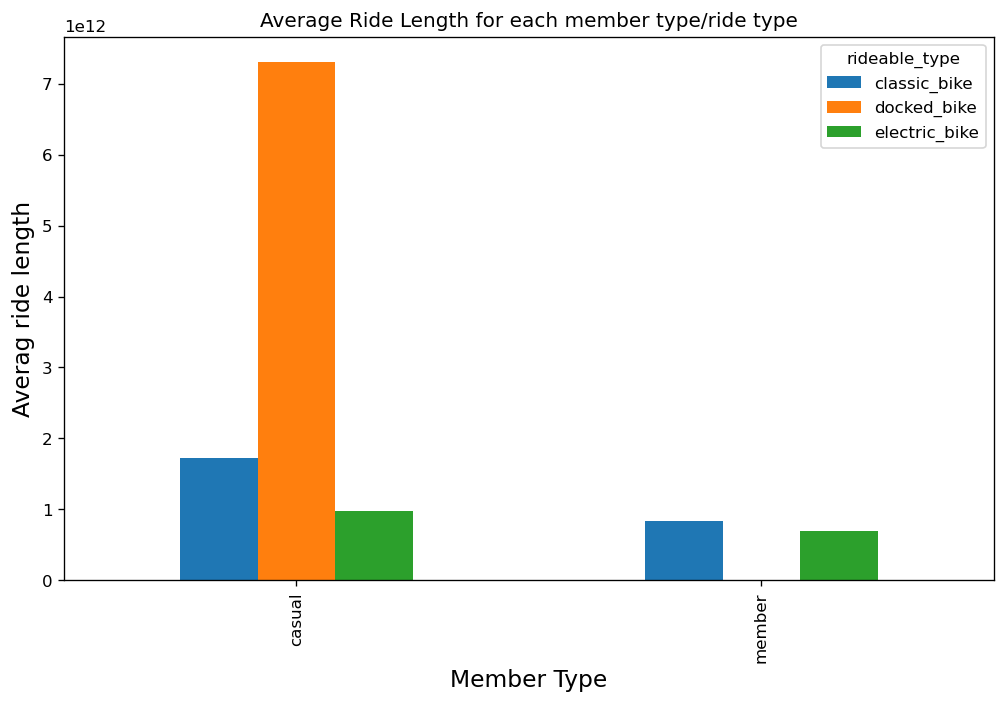

In [82]:
# Plot the above data
# Get the unique values of the first index
index1_values = avg_member_ride['ride_length'].index.get_level_values(0).unique()

# Get the unique values of the second index
index2_values = avg_member_ride.index.get_level_values(1).unique()

#print(index1_values, index2_values)

# Iterate through the unique values of the first index
data = avg_member_ride.loc[index1_values]['ride_length']['mean'].unstack()

data.plot(kind='bar')
plt.title("Average Ride Length for each member type/ride type")
plt.xlabel('Member Type', fontsize=14)
plt.ylabel('Averag ride length', fontsize=14)
plt.savefig(r".\graphs\avg_ride_length_for_each_ride.png")
plt.show()

#### Findings:

Caual riders uses more time in average than members. 

Which day of the week has the highest demand?

In [82]:
info_per_weekday = df.groupby(['member_casual', 'rideable_type', 'day_of_week']).agg({'ride_length': ['mean', 'max', 'min', 'count']})
info_per_weekday

ride_length                    \
                                                 mean               max   
member_casual rideable_type day_of_week                                   
casual        classic_bike  1            1.734235e+12    89997000000000   
                            2            1.628737e+12    90027000000000   
                            3            1.564908e+12    89998000000000   
                            4            1.592598e+12    90027000000000   
                            5            1.668218e+12    90023000000000   
                            6            1.823261e+12    93596000000000   
                            7            1.894588e+12    90055000000000   
              docked_bike   1            7.030882e+12  1922127000000000   
                            2            6.861554e+12  1865151000000000   
                            3            6.803566e+12  2149238000000000   
                            4            6.994119e+12  1861410000000000   
                            5            7.725836e+12  1944178000000000   
                            6            7.565091e+12  2483235000000000   
                            7            7.827835e+12  2175468000000000   
              electric_bike 1            9.745983e+11    28796000000000   
                            2            8.691919e+11    28823000000000   
                            3            8.545171e+11    28796000000000   
                            4            8.798225e+11    28800000000000   
                            5            9.412854e+11    28799000000000   
                            6            1.092035e+12    28800000000000   
                            7            1.103570e+12    28826000000000   
member        classic_bike  1            8.038633e+11    89997000000000   
                            2            7.977006e+11    89997000000000   
                            3            7.926497e+11    89997000000000   
                            4            8.072074e+11    89997000000000   
                            5            8.202568e+11    89998000000000   
                            6            9.322112e+11    93594000000000   
                            7            9.207287e+11    89997000000000   
              electric_bike 1            6.622136e+11    28825000000000   
                            2            6.528702e+11    36864000000000   
                            3            6.577721e+11    28829000000000   
                            4            6.673278e+11    28822000000000   
                            5            6.845433e+11    28827000000000   
                            6            7.602846e+11    28830000000000   
                            7            7.567991e+11    28827000000000   

                                                             
                                                min   count  
member_casual rideable_type day_of_week                      
casual        classic_bike  1            1000000000  104253  
                            2            1000000000   96118  
                            3            1000000000   98362  
                            4            1000000000  113830  
                            5            1000000000  123121  
                            6            1000000000  197155  
                            7            1000000000  158567  
              docked_bike   1            1000000000   22535  
                            2            2000000000   17756  
                            3            2000000000   17335  
                            4            1000000000   19773  
                            5            1000000000   23386  
                            6            1000000000   40956  
                            7            1000000000   35727  
              electric_bike 1            1000000000  150861  
                            2            1000000000  149832  
             

In [88]:
index1_values = info_per_weekday['ride_length'].index.get_level_values(0).unique()

data = info_per_weekday.loc[index1_values]['ride_length']['mean'].unstack()
#data['ride_length'] = data.values.astype('int64')
data.fillna(0, inplace=True)
data

day_of_week                             1             2             3  \
member_casual rideable_type                                             
casual        classic_bike   1.734235e+12  1.628737e+12  1.564908e+12   
              docked_bike    7.030882e+12  6.861554e+12  6.803566e+12   
              electric_bike  9.745983e+11  8.691919e+11  8.545171e+11   
member        classic_bike   8.038633e+11  7.977006e+11  7.926497e+11   
              electric_bike  6.622136e+11  6.528702e+11  6.577721e+11   

day_of_week                             4             5             6  \
member_casual rideable_type                                             
casual        classic_bike   1.592598e+12  1.668218e+12  1.823261e+12   
              docked_bike    6.994119e+12  7.725836e+12  7.565091e+12   
              electric_bike  8.798225e+11  9.412854e+11  1.092035e+12   
member        classic_bike   8.072074e+11  8.202568e+11  9.322112e+11   
              electric_bike  6.673278e+11  6.845433e+11  7.602846e+11   

day_of_week                             7  
member_casual rideable_type                
casual        classic_bike   1.894588e+12  
              docked_bike    7.827835e+12  
              electric_bike  1.103570e+12  
member        classic_bike   9.207287e+11  
              electric_bike  7.567991e+11

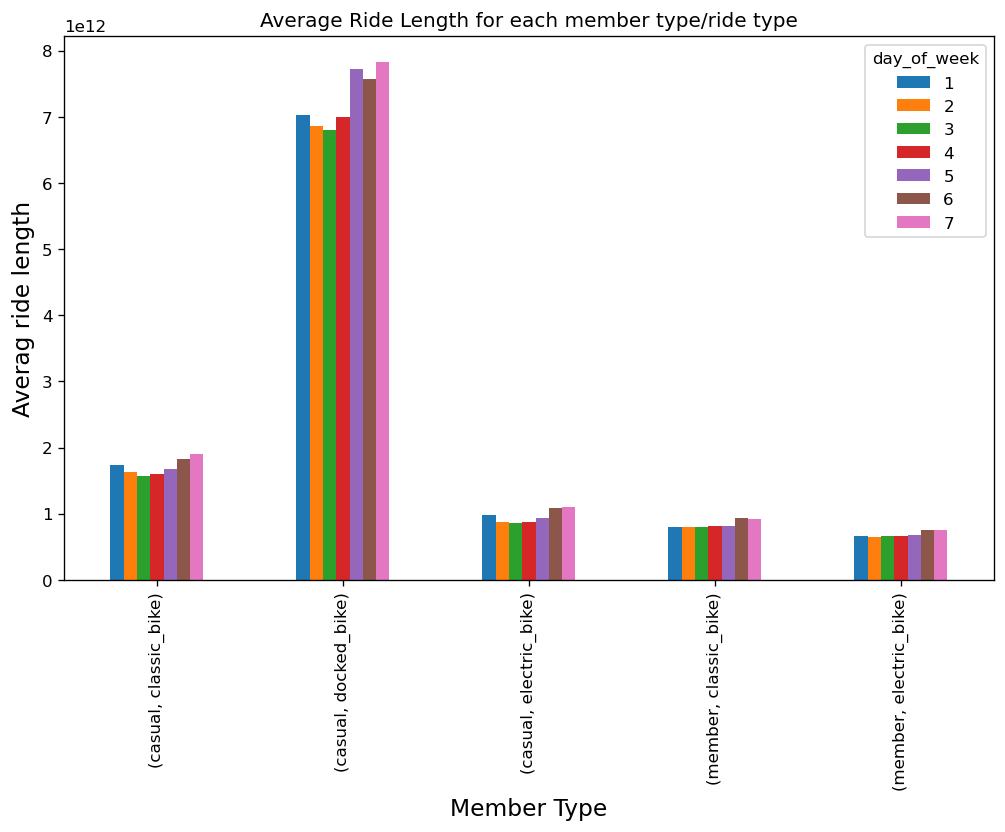

In [89]:
data.plot(kind='bar')
plt.title("Average Ride Length for each member type/ride type")
plt.xlabel('Member Type', fontsize=14)
plt.ylabel('Averag ride length', fontsize=14)
plt.show()

In [39]:
# How many stations?
print(f"Number of start station id: {len(df['start_station_id'].unique())}\nNumber of start station name: {len(df['start_station_name'].unique())}")
print(f"Number of end station id: {len(df['end_station_id'].unique())}\nNumber of end station name: {len(df['end_station_name'].unique())}")

Number of start station id: 1314
Number of start station name: 1675
Number of end station id: 1318
Number of end station name: 1693


Why are those number different?

In [91]:
member = df['member_casual'].value_counts()[0]
casual = df['member_casual'].value_counts()[1]

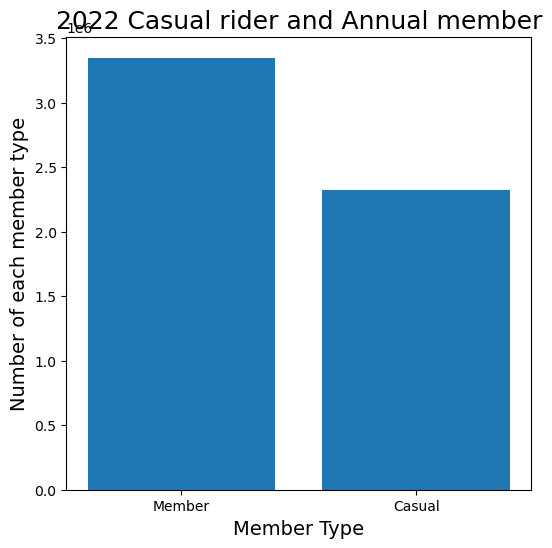

In [92]:
# Compare the number of casual riders and annual members
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6), dpi=100)
plt.bar(["Member", "Casual"], height=[member, casual])
plt.title("2022 Casual rider and Annual member", fontsize=18)
plt.xlabel("Member Type", fontsize=14)
plt.ylabel("Number of each member type", fontsize=14)
plt.show()

In [93]:
# Check the ridable type
df['rideable_type'].unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [94]:
electric = df['rideable_type'].value_counts()[0]
classic = df['rideable_type'].value_counts()[1]
docked = df['rideable_type'].value_counts()[2]

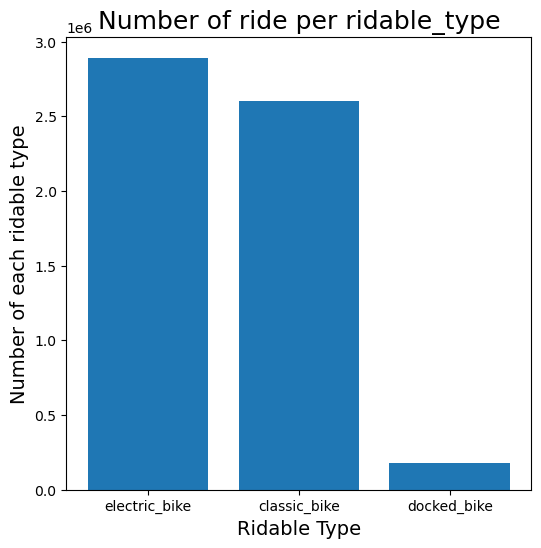

In [95]:
plt.figure(figsize=(6, 6), dpi=100)
plt.bar(['electric_bike', 'classic_bike', 'docked_bike'], height=[electric, classic, docked])
plt.title("Number of ride per ridable_type", fontsize=18)
plt.xlabel("Ridable Type", fontsize=14)
plt.ylabel("Number of each ridable type", fontsize=14)
plt.show()

In [96]:
# Casual rider and member for ridable type
data = df.groupby(['member_casual', 'rideable_type']).size().unstack()
data

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,891406.0,177468.0,1252895.0
member,1709682.0,NaN,1635735.0


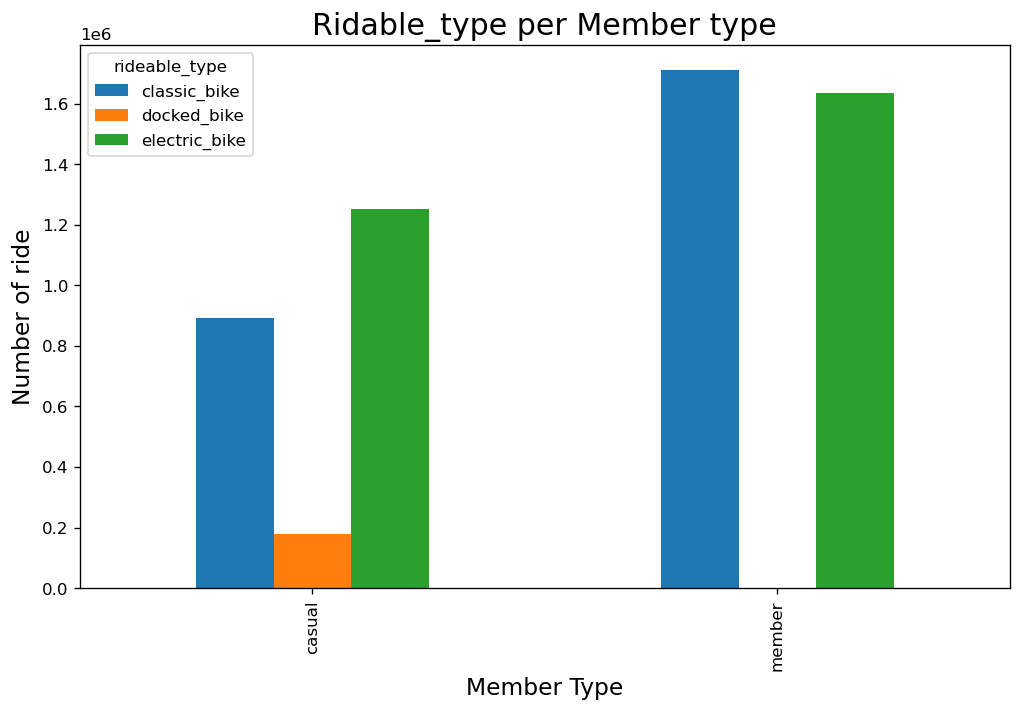

In [98]:
data.plot(kind='bar')
plt.title("Ridable_type per Member type", fontsize=18)
plt.xlabel("Member Type", fontsize=14)
plt.ylabel("Number of ride", fontsize=14)
plt.savefig(r".\graphs\num_of_ride_each_member_each_ride_type.png")
plt.show()

### Findings:

* Docked bike looks like for casual riders. 
* Casual rider used electric bike more, but the anual member uses clasic bike more. 
* A casual rider has used a dock bike for a long period of time, even though the number of uses is low.
* Both casual riders and annual members use both electric bikes and classic bikes in a similar manner.
* The reason of the casual rider got long ride time is many casual rider is using the bike for several days without returning. 

From those findings, difference between casual riders and annual members are the time spending on docked bike. 